In [1]:
import numpy as np
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import math

from utils_data import *
from Kmeans import *
from KNN import *



root_folder = './images/'
json_file = './images/gt.json'

# Load all the images and GT
def load_test():
    train_imgs, train_class_labels, train_color_labels, test_imgs, test_class_labels, \
    test_color_labels = read_dataset(root_folder=root_folder, gt_json=json_file)
    
    return test_imgs, test_class_labels,test_color_labels

def load_train():
    train_imgs, train_class_labels, train_color_labels, test_imgs, test_class_labels, \
    test_color_labels = read_dataset(root_folder=root_folder, gt_json=json_file)
    
    return train_imgs, train_class_labels, train_color_labels, test_imgs, test_class_labels, test_color_labels
    
def load_cropped():
    # Load extended ground truth
    imgs, class_labels, color_labels, upper, lower, background = read_extended_dataset()
    cropped_images = crop_images(imgs, upper, lower)
    
    return imgs, cropped_images, class_labels, color_labels, background
    
    
train_imgs, train_class_labels, train_color_labels, test_imgs, test_class_labels, \
    test_color_labels = read_dataset(root_folder=root_folder, gt_json=json_file)

# List with all the existent classes
classes = list(set(list(train_class_labels) + list(test_class_labels)))

# Load extended ground truth
imgs, class_labels, color_labels, upper, lower, background = read_extended_dataset()
cropped_images = crop_images(imgs, upper, lower)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(180, 80, 60, 3)
(180,)


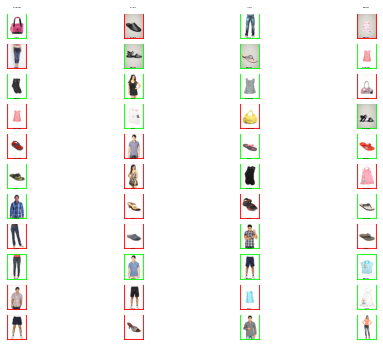

{'Jeans', 'Flip Flops', 'Shirts', 'Sandals', 'Dresses', 'Shorts', 'Heels', 'Socks', 'Handbags'}


In [16]:
# Prova

# using the function visualize_retrieval for the visualization of the retrieval results. Pass the class labels as information to be displayed
predicted = np.random.choice([True, False], len(cropped_images))
print(imgs.shape)
print(cropped_images.shape)
visualize_retrieval(imgs, topN=44, info=class_labels, ok=predicted)

print(set(class_labels))

## 4.1: Funcions d’anàlisi qualitatiu

### Retrieval_by_color (Aleix)

In [18]:
# Code
def Retrieval_by_color(imgs, color_labels, query_img):
    """
        Function to retrieve images by color
            Args:
                imgs: array with the images
                color_labels: array with the color labels
                query_img: list of strings with the query images.
                    Example: ['Red'] or ['Red', 'Black']
            Returns:
                imgs_retrieved: array with the images that have the same color as the query image
                color_labels_retrieved: array with the color labels of the images that have the same color as the query image
        """
    color_labels_retrieved = []
    if(len(imgs) != len(color_labels)):
        raise ValueError("imgs and color_labels must have the same length")
    imgs_retrieved = []
    #using zip to iterate over two lists at the same time
    for img, color in zip(imgs, color_labels):
        #check if all the colors in the query_img are in the color of the image
        if(all(x in color for x in query_img)):
            imgs_retrieved.append(img)
            color_labels_retrieved.append(color)
    return imgs_retrieved, color_labels_retrieved

def check_color_prediction(imgs, color_labels, color_labels_predicted, query_img):
    """
        Function to check if the color prediction is correct
            Args:
                imgs: array with the images
                color_labels: array with the color labels
                color_labels_predicted: array with the predicted color labels
                query_img: list of strings with the query images.
                    Example: ['Red'] or ['Red', 'Black']
            Returns:
                ok: array with the boolean values of the correct predictions
    """
    if(len(imgs) != len(color_labels) or len(imgs) != len(color_labels_predicted)):
        raise ValueError("imgs, color_labels and color_labels_predicted must have the same length")
    
    ok = []
    # Check if the color prediction is correct. If the color of the color_labels have all the colors in the query_img and the same as the color_labels_predicted, then it is correct.
    for color, color_predicted in zip(color_labels, color_labels_predicted):
        if(all(x in color for x in query_img)):
            if(all(x in color_predicted for x in query_img)):
                ok.append(True)
            else:
                ok.append(False)
        else:
            if not (all(x in color_predicted for x in query_img)):
                ok.append(True)
            else:
                ok.append(False)
    return ok


print(imgs.shape)
# imgs = imgs[:179]
print(imgs.shape)


query_img = np.array(['Black', 'Pink'])
# options
options = {'km_init': 'first', 'fitting': 'silhouette', 'tolerance': 5}
# KMeans
km_predicted_colors = []
# for img in imgs:
#     km = KMeans(X=img)
#     km.find_bestK(max_K=11)
#     km_predicted_colors.append(get_colors(km.centroids))


def process_image(img):
    km = KMeans(X=img, options=options)
    km.find_bestK(max_K=11)
    return get_colors(km.centroids)

def process_images(imgs, parallel):
    if parallel:
        from joblib import Parallel, delayed
        return Parallel(n_jobs=2)(delayed(process_image)(img) for img in imgs)
    else:
        return [process_image(img) for img in imgs]
    
km_predicted_colors = process_images(imgs, parallel=True)

imgs_retrieved, colors_retrieved = Retrieval_by_color(imgs, km_predicted_colors, query_img=query_img)
visualize_retrieval(imgs_retrieved, topN=48, info=colors_retrieved, fac_size=2)
ok = check_color_prediction(imgs, color_labels[:len(imgs)], km_predicted_colors, query_img=query_img)
# Green: Image identified correctly. Red: Image identified incorrectly, can be a false positive or a false negative
visualize_retrieval(imgs, topN=len(imgs), info=color_labels, ok=ok, fac_size=5)
# print ratio of correct predictions
print("Correct predictions: ", np.sum(ok)/len(ok))

(180, 80, 60, 3)
(180, 80, 60, 3)


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TypeError: visualize_retrieval() got an unexpected keyword argument 'fac_size'

### Retrieval_by_shape

En aquest apartat trobem funcions que ens permetran mostrar les dades resultants del nostre KNN. Aquestes funcions són:

- check_shape_prediction(...)
    
    Paràmetres d'entrada
    - prediccions: llista d'strings, llista de les nostres prediccions
    - labels: llista d'strings, llista dels ground_truth

    Paràmetres de sortida:
    - check_list: llista de bools, llista de totes les prediccions encertades

    En aquesta funció es genera una llsita amb totes les prediccions encertades per l'algorisme

- retrieval_by_shape(...)

    Paràmetres d'entrada:
    - train_imgs: numpyarray, mida: (P, N, M, 3), vector de les imatges d'entrenament.
    - train_class_labels: numpyarray, mida: (P, ), vector del ground truth de les imatges d'entrenament
    - test_imgs, numpyarray, mida: (P, N, M, 3), vector de les imatges de test
    - test_class_labels:  numpyarray, mida: (P, ), vector del ground truth de les imatges de test
    - k: int, nombre de veins als que mirar, per defecte = 10

    Paràmetres de sortida:
    - prediccions: llista d'strings, llista de les nostres prediccions 
    - test_class_labels: numpyarray, mida: (P, ), vector del ground truth de les imatges de test
    - ok: llista de bools, llista de totes les prediccions encertades

    En aquesta funció s'inicialitza el KNN, es fan prediccions i es comproven les prediccions amb el ground_truth

- show_predictions(...)

    Paràmetres d'entrada:
    - images:  numpyarray, mida: (P, N, M, 3), vector de les imatges de test
    - prediccions: llista d'strings, llista de les nostres prediccions 
    - labels: llista d'strings, llista dels ground_truth/labels
    - ok: llista de bools, llista de totes les prediccions encertades
    - shape: string o array, peça de roba a identificar, per defecete = ['Jeans']

    En aquesta funció es mostraràn per pantalla totes les prediccions fetes per el nostre KNN per a una o varies peces de roba.

    NOTES:
    - La funció detectarà que es pugui passar un string com a parametre, sempre i quant nomès sigui una peça de roba ( ex: 'Jeans' → [\'Jeans\'], peró 'JeansShorts' → [\'JeansShorts\'] )

A continuació deixo una llista amb tots els tipus de peçes de roba per si es vol testejar el codi:
['Flip Flops', 'Jeans', 'Shirts', 'Sandals', 'Dresses', 'Shorts', 'Heels', 'Socks', 'Handbags']

In [47]:
# Code
import KNN

def check_shape_prediction(prediccions, labels):
    # Fem llista de prediccions correctes
    check_list = [pred == label for pred, label in zip(prediccions, labels)]
    return check_list

    
def retrieval_by_shape(train_imgs, train_class_labels, test_imgs, test_class_labels, k=10):
    # Inicialitzem i entrenem el KNN
    knn = KNN.KNN(train_data=utils.rgb2gray(train_imgs), labels=train_class_labels)

    # Fem les prediccions
    predictions = knn.predict(utils.rgb2gray(test_imgs), k=k)

    # Comprovem que les validacions siguin correctes
    ok = check_shape_prediction(prediccions=predictions, labels=test_class_labels)

    return predictions, test_class_labels ,ok

def show_predictions(images, prediccions, labels, ok, shape=['Jeans']):
    
    # Fem que si la entrada és una string s'inclogui dins d'un array
    if type(shape) is str:
        shape = [shape]
    
    # Preparem les llistes que farèm servir per mostrar les dades
    labels_to_print = []
    images_to_print = []
    ok_to_print = []
    for img, pred, label, o in zip(images, prediccions, labels, ok):
        
        # Aquí filtrem per les dades que hem predit i que coincideixen amb els resultats
        if pred in shape:
            labels_to_print.append([pred, label])
            images_to_print.append(img)
            ok_to_print.append(o)
    
    # Transformem llistes en np.numpyarray
    labels_to_print = np.array(labels_to_print)    
    images_to_print = np.array(images_to_print)
    ok_to_print = np.array(ok_to_print)
    
    # Mostrem les dades fent us de la funció 
    visualize_retrieval(images_to_print, topN=len(images_to_print), info=labels_to_print, ok=ok_to_print, fac_size=5, title=shape)


↓ Execució de prova de les funcions

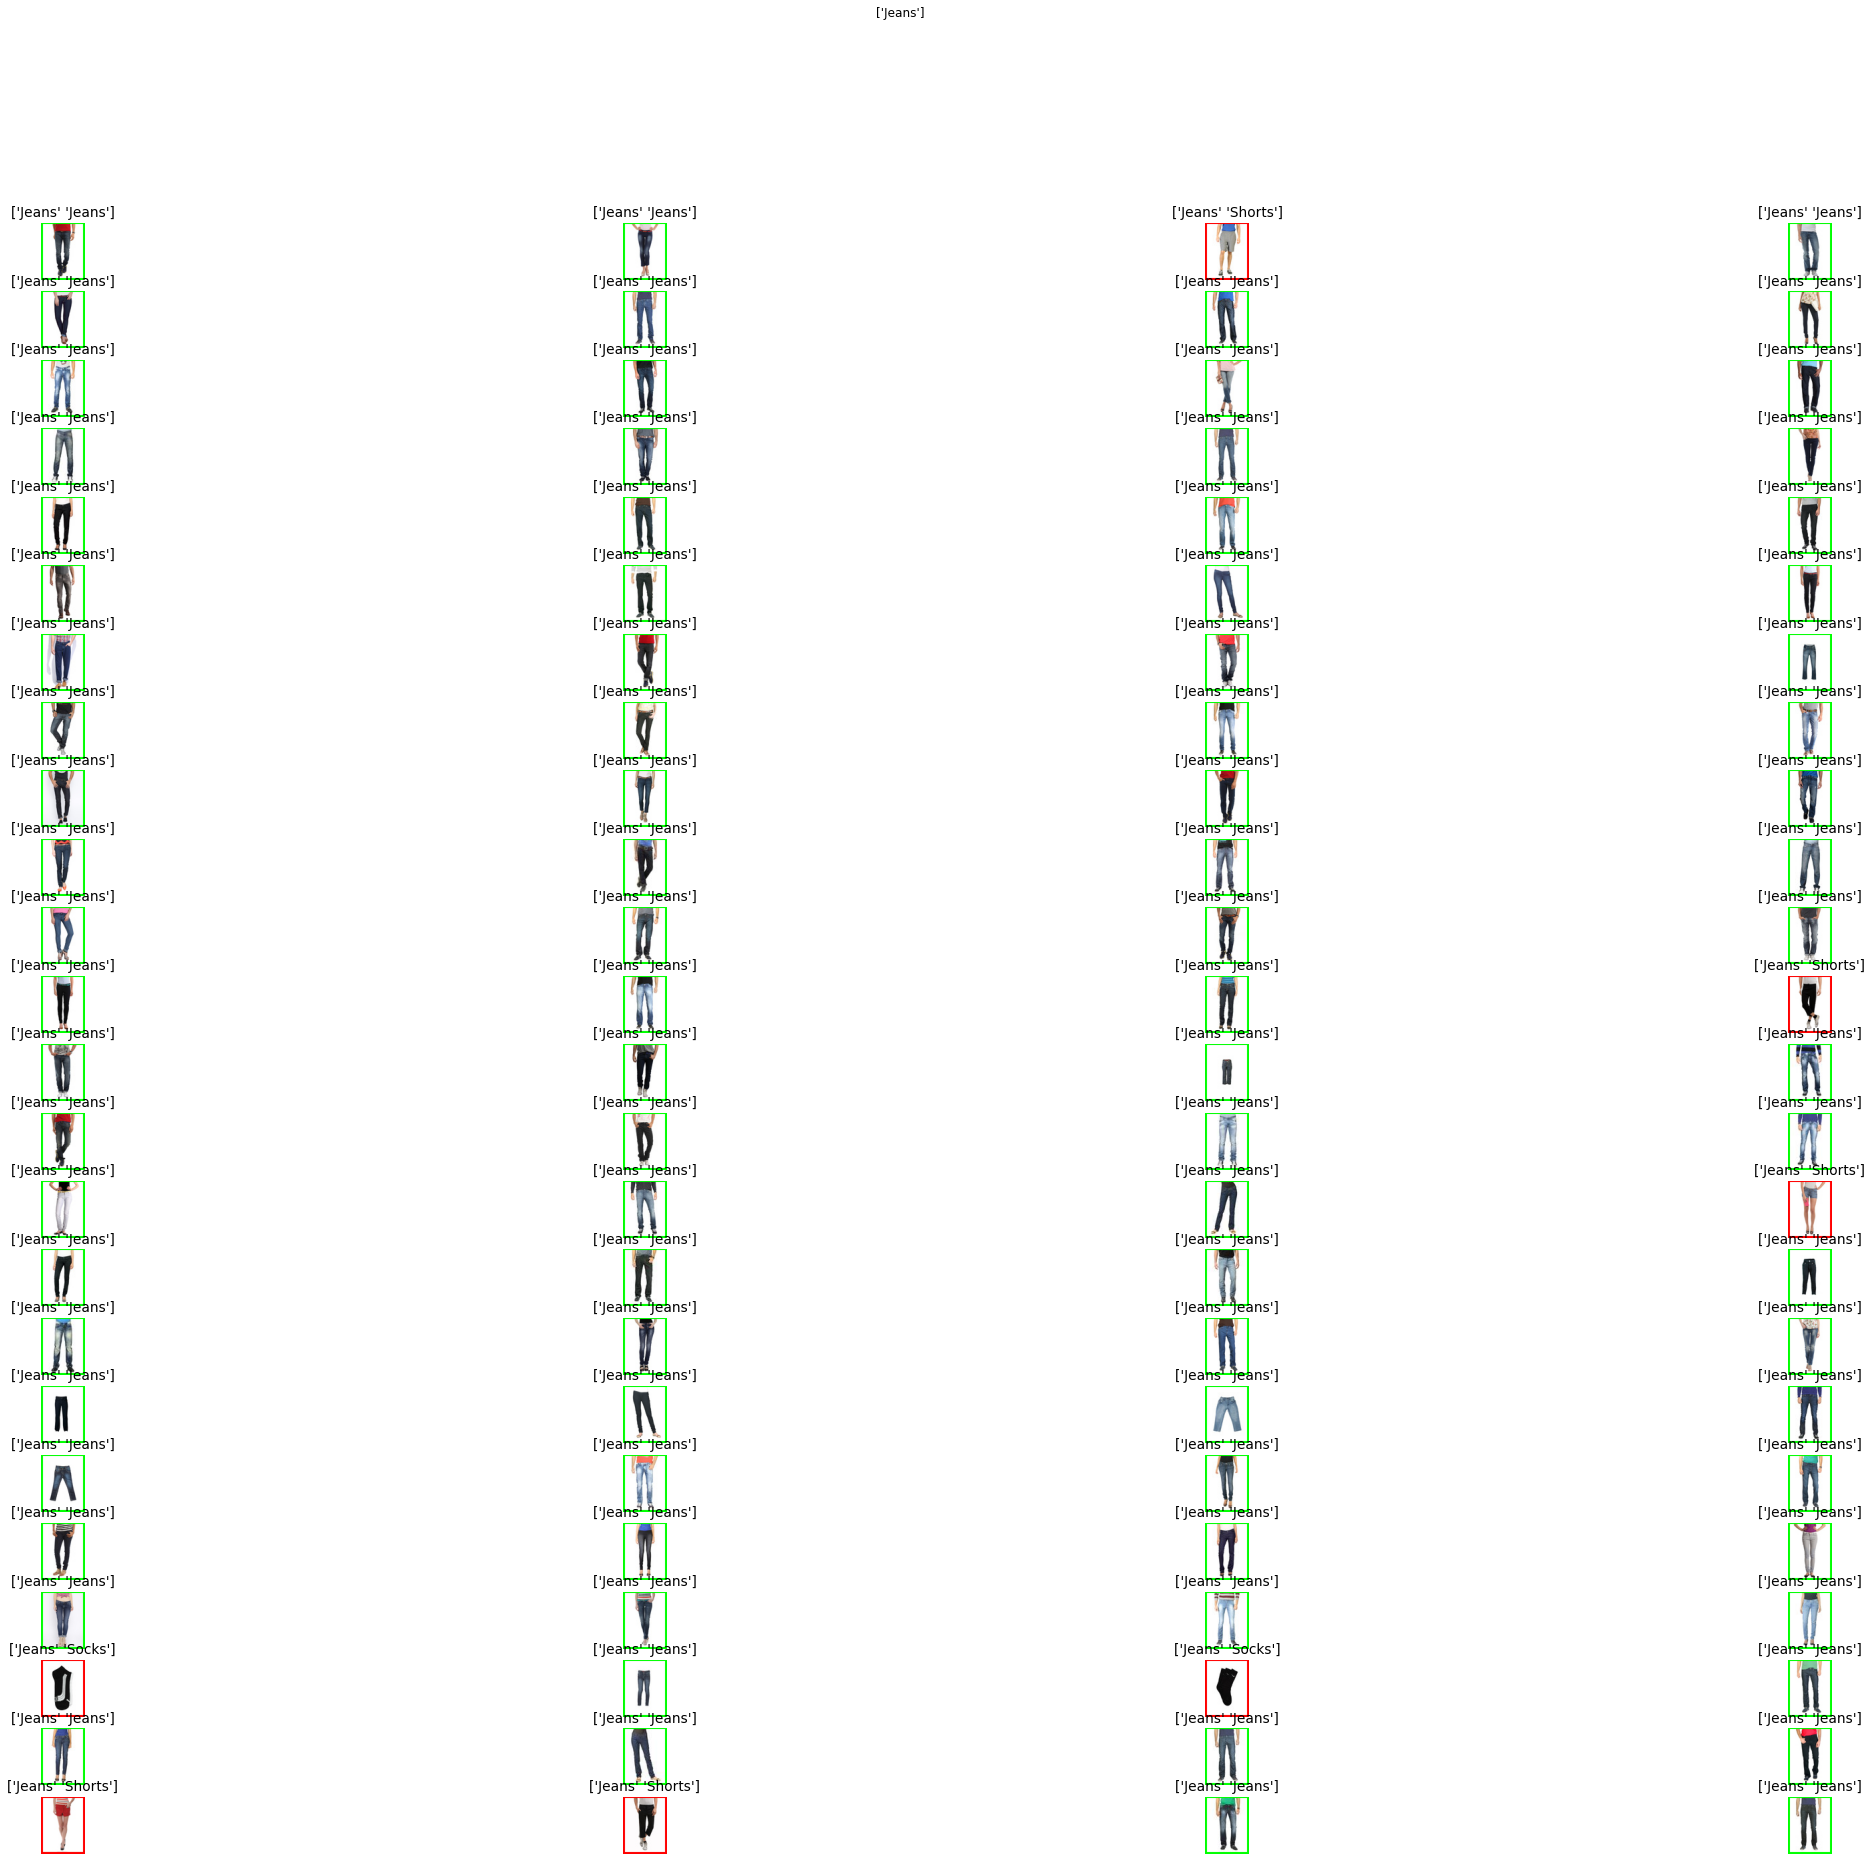

In [48]:
# Execution
# Carreguem les imatges
train_imgs, train_class_labels, train_color_labels, test_imgs, test_class_labels, test_color_labels = load_train()

# Entrenem i fem les prediccions del KNN
predictions, labels, ok = retrieval_by_shape(train_imgs, train_class_labels, test_imgs, test_class_labels, k=10)

# Mostrem els resultats
show_predictions(images=test_imgs, prediccions=predictions, labels=labels, ok=ok, shape=['Jeans'])

#### Prediccions per classe

A continuació es mostren els resultats del KNN per classes

### Retrieval_combined (Aleix)

In [ ]:
# Code

## Funcions d’anàlisi quantitatiu

### Kmean_statistics

Hem realitzat dues funcions per a la execució d'questa part. Procedim a explicar-les:

- plot_wcd_iter_temps_and_means(...): 
    
    Paràmetres d'entrada:
    - heur: vector de vectors, heurística, per defecte = None
    - iter: vector de vectors, iteracions, per defecte = None 
    - temps: vector de vectors, temps, per defecte = None
    - Kmax: int, nombre maxim de K, per defecte = 10
    - nom_heur: string, nom de la gràfica de la Heurística, per defecte = 'Heurística'

    Es mostraràn 3 plots amb les dades dels vectors que es passin per paràmetres, es mostraràn les dades de puntets de colors i la mitja en una linea negra. 

    Cal tenir en compte un parell de coses:
    - Aquesta funció NO calcula res, nomès mostra
    - En cas de no voler mostrar alguna cosa no passeu res com a paràmetre 
    - Podeu indicar el nom de la heurística peró res més


- Kmean_statistics(...):
    
   Paràmetres d'entrada: 
    - imgs: set d'imatges d'entrada
    - kmax: int, nombre maxim de K, per defecte = 10
    - num_imatges, nombre d'imatges per les quals iterar, per defecte = 10

    Return:
    - heur_lst: vector de vectors, llista del les heurístiques 
    - iter_lst: vector de vectors, llista del les iteracions
    - temps_lst: vector de vectors, llista dels temps de cada fit

    Iterem per totes les imatges i executem el fit tatnes vegades com el vector K, es guardaràn el nombre d'iteracions, les heurístiques finals, i el temps que s'ha trigat en fer el fit de cada K. 

In [55]:
# Aquesta funció serveix per a fer 3 plots, de la heurística 
def plot_wcd_iter_temps_and_means(heur = None, iter=None, temps=None, Kmax=10, nom_heur='Heurística'):
    
    # Aquesta comanda serveix per a dir el nombre de columnes i files dels plots, a més de les dimensions de tot plegat
    fig, ax = plt.subplots(1, 3, figsize=(20, 20))
    
    # Avans de mostrar qualsevol dada comprovo que aquesta existeixi 
    if heur is not None:
        
        # Primer mostrem totes les dades en "linies" individuals
        
        i = 0   # i serveix per a controlar l'index i actualitzar el label de la imatge
        max_height = max(heur[0])   # max_height serveix per a trobar el valor màxim del plot, és util per a mesurar les dimensions del cada plot
        
        # itero per cada element de la mètrica en questió, el mostro i actualitzo max_height si s'escau
        for h in heur:
            # aquesta funció afegeix a la figura ax[0][0] la recta h, notem que es guarden les rectes anteriorment asignades a ax[0][0]
            ax[0].plot(range(2,2+Kmax-1), h, label=f'imatge{i}', linestyle='dotted', ) # el range(...) indica de on a on va l'eix X
            
            # Busquem si hi ha la major altura i augmentem i
            if max_height < max(h):
                max_height = max(h)
            i+=1
        
        # Acontinuació fem i mostrem la mitjana de totes les linies
        heur_array = np.array(heur)
        means = np.mean(heur_array, axis=0)
        ax[0].plot(range(2,2+Kmax-1), means, label='Average heurístic value', linewidth=2, color='black')
        
        
        # Poso titols al plot i als eixos, i mostro la llegenda
        ax[0].set_title(nom_heur + ' per K')
        ax[0].set_xlabel('K')
        ax[0].set_ylabel(nom_heur)
        
        # Mostrem la llegenda en cas de que hi hagin poques linies
        if(len(heur) <= 5):
            ax[0].legend() 
        
        # Aquí indico les dimensions del plot, per a que tingui una forma ben maca :)
        ax[0].set_aspect(aspect=Kmax/max_height)
        ax[0].figure.set_size_inches(20, 20)
        
            
    if iter is not None:

        i, max_height = 0, max(iter[0])
        for it in iter:
            ax[1].plot(range(2,2+Kmax-1), it, label=f'imatge{i}', linestyle='dotted',)
            
            if max_height < max(it):
                max_height = max(it)
            i += 1
            
        iter_array = np.array(iter)
        means = np.mean(iter_array, axis=0)  
        ax[1].plot(range(2,2+Kmax-1), means, label='Average iterations', linewidth=2, color='black') 
            
        ax[1].set_title('Number of iterations needed per K')
        ax[1].set_xlabel('K')
        ax[1].set_ylabel('# Iterations')
        
        if(len(iter) <= 5):
            ax[1].legend() 
        
        ax[1].set_aspect(aspect=Kmax/max_height)
        ax[1].figure.set_size_inches(20, 20)
        
  
    
    if temps is not None:
        i, max_height = 0, max(temps[0])
        for t in temps:
            ax[2].plot(range(2,2+Kmax-1), t, label=f'imatge{i}',linestyle='dotted')
            if max_height < max(t):
                max_height = max(t)
            i += 1
        
        time_array = np.array(temps)
        means = np.mean(time_array, axis=0)
        ax[2].plot(range(2,2+Kmax-1), means, label='Average fit time',linewidth=2, color='black')
        
        
        ax[2].set_title('Execution time of each Kmeans fit')
        ax[2].set_xlabel('K')
        ax[2].set_ylabel('Time')
        
        if(len(temps) <= 5):
            ax[2].legend() 
            
        ax[2].set_aspect(aspect=Kmax/max_height)
        ax[2].figure.set_size_inches(20, 20)

    
    
    # Ajusto l'espai que hi ha entre plots per a que es vegi bé
    plt.subplots_adjust(wspace=.7) 

    plt.show()

In [13]:
from Kmeans import KMeans
import time

# Aquesta funció avaluarà la funcuó fit, d'una fomrma semblant a la que implenentariem un find_best_k()
def Kmean_statistics(imgs, kmax, num_imatges=10):
    
    heur_lst, iter_lst, temps_lst = [], [], []
    #for ix, input in enumerate(test_cases['input']):
    for input in imgs[0:num_imatges]:
    
        # Inicialitzem una nova classe K-Means amb la nova imatge
        km = KMeans(input)
        
        # Calculem les estadístiques
        heur, iter, temps = [], [], []
        
        # Fem un model fit per a cada K diferent dins del rang [2, Kmax] i en guardem les mètriques demanades
        for i in range(2, kmax+1):
            km.num_iter = 0
            km.K = i
            
            # calculem el temps que es triga en fer el fit (en segons)
            start_time = time.time()
            km.fit()
            end_time = time.time()
            
            
            heur.append(km.withinClassDistance())
            iter.append(km.num_iter)
            temps.append(end_time - start_time)   

        # Afegim les noves metriques al les llistes de llistes
        heur_lst.append(heur)
        iter_lst.append(iter)
        temps_lst.append(temps)
    
    return heur_lst, iter_lst, temps_lst


↓ Execució de prova de les funcions

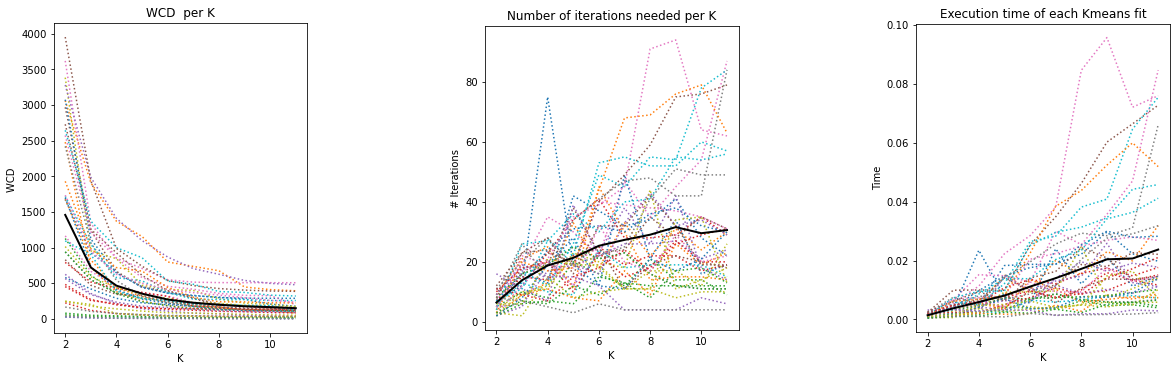

In [14]:
# Creem les llistes de dades i executem la funció Kmean_statistics per cada imatge 
K_MAX = 11
NUM_IMATGES = 40

# Carreguem dades
test_imgs, test_imgs_cropped, test_class_labels, test_color_labels = load_cropped()

# Calculem les estadistiques
wcd, iter, temps = Kmean_statistics(imgs=test_imgs_cropped, kmax=K_MAX, num_imatges=40, )
    
# Mostrem els resultat 
plot_wcd_iter_temps_and_means(heur=wcd, iter=iter, temps=temps, Kmax=K_MAX, nom_heur='WCD ')

### Get_shape_accuracy (Aleix)

### Get_color_accuracy

En aquest apartat hem calculat diferents les metriques: True Positive (TP), False Positive(FP), False Negative(FN) i l'average per a un total d'N imatges , extretes del extended dataset, per a dos casos diferents, quan tenim en compte les repeticions com a false negative i quan no.

Per repeticions entenem a dos centroides que generen els mateixos colors desprès de fer un fit() (ex: [\"Blue\"], [\"Blue\"], [\"Pink\"] → es repeteix el \"Blue\" dos cops). A més donem per sentat que no existeixen repeticions de colors al Ground-Truth

Per a cada imatge del expanded kmenas següim el següent el procediment:
    
1. Realitzar el K-Means (findBestK & fit)    
2. Trobem els colors equivalents als centroides 
3. Actualitzem el nombre de Ks correctes (o no)
4. ACtualitzem el total de TP, FP, FN i el nombre de colors repetits en els resultats
5. Calculem l'accuracy
6. Mostrem els resultats

Aquesta funció (get_colors_accuracy(...)) serà més util més endavant a la hora de mirar eficiencies d'Heuristiques.

In [30]:
from Kmeans import KMeans
from Kmeans import get_colors
import copy

MAX_COLORS = 11
color_indexes = {'White': 0, 'Grey': 1, 'Black': 2, 'Orange': 3, 'Red': 4, 'Brown': 5, 'Pink': 6, 'Blue': 7, 'Green': 8, 'Purple' : 9, 'Yellow' : 10, 'None' : 11}

def get_colors_accuracy(imatges , labels, num_imatges=20, repeated_accounted=1,):
    
    # Inicialitzem les matrius i altres metriques
    trues_and_false_matrix = [0, 0, 0, 0] # Positive, False Positive, False Negative, Repeated 
    encerts_k = [0, 0] # Encert, Falla
    
    
    for image, true_colors in zip(imatges[0:num_imatges], labels[0:num_imatges]):
        
        # Inicialitzem un K-Means, trobem la millor K i predim els centroides 
        km=KMeans(image)
        km.find_bestK(max_K=MAX_COLORS)
        #km.fit()
        centroids = km.centroids

        # A partir dels centroides trobem els colors
        predicted_colors = get_colors(centroids=centroids)
        true_colors = copy.deepcopy(true_colors)
        
        #print(predicted_colors)
        #print(len(predicted_colors))
        #print(true_colors)
        #print(len(true_colors))
        
        
        # Calculem l'encert entre la K calculada i la K verdadera
        if km.K is len(true_colors):
            encerts_k[0] += 1
        else: 
            encerts_k[1] += 1
        
        
            
        # a in b → Correct
        # a not in b → False Positive
        # b not in a → False Negative
        # len a in a > 1 → Repetit
        
        # Actualitzem la matriu
        colors_done = [] # Aquesta llista ens permet recordar els colors vistos
        for predicted_color in predicted_colors:
            # REPETITS: Marquem color repetit si n'hi ha mes de 2 i no l'hem vist encara
            if predicted_color not in colors_done:
                if predicted_colors.count(predicted_color) > 1:
                    # Marquem color repetit
                    trues_and_false_matrix[3] += 1 
                    
                    # Marquem el color com a ja analitzat
                    colors_done.append(predicted_color)
                
            # TRUE:
            if predicted_color in true_colors:
                # Marquem True Positive
                trues_and_false_matrix[0] += 1
                
                # Eliminem color del Ground Truth
                true_colors.remove(predicted_color) # Donem per sentat que al Ground Truth no hi han colors repetits.

                
            # FALSE POSITIVE:
            if predicted_color not in true_colors:
                if predicted_color in colors_done:
                    trues_and_false_matrix[1] += repeated_accounted 
                else:
                    # Marquem False Positive
                    trues_and_false_matrix[1] += 1 
                
        # FALSE NEGATIVE
        trues_and_false_matrix[2] += len(true_colors)
        
                
    
    # accuracy K-Means
    accuracy =  trues_and_false_matrix[0] / (trues_and_false_matrix[0] + trues_and_false_matrix[1] + trues_and_false_matrix[2]) * 100
    
    
    # Print results
    if repeated_accounted:
        print("Resultats Kmeans (repeated acounted for):\n")
    else:
        print("Resultats Kmeans (repeated NOT acounted for):\n")
    
    print("Encerts K:", encerts_k[0])
    print("Falles K:", encerts_k[1])
    print("Percentatge d'encerts K", encerts_k[0]/(encerts_k[0]+encerts_k[1])*100, "%\n")
    
    print("__________________________")
    print("| True Positives  | ", trues_and_false_matrix[0], "|")
    print("|_________________|______|")
    print("| False Positives | ", trues_and_false_matrix[1], "|")
    print("|_________________|______|")
    print("| False Negatives | ", trues_and_false_matrix[2], "|")
    print("|_________________|______|")
    print("| Repeated        | ", trues_and_false_matrix[3], "|")
    print("|_________________|______|")
    
    print("\Accuracy = ", accuracy, "%\n\n")
    
    
    #return trues_and_false_matrix, accuracy

↓ Execució de prova de les funcions

In [57]:
test_imgs, test_imgs_cropped, test_class_labels, test_color_labels = load_cropped()

#confusion_matrix, accuracy_list, accuracy_mean = get_colors_accuracy(num_imatges=len(test_imgs))
get_colors_accuracy(imatges=test_imgs_cropped, labels=test_color_labels, num_imatges=len(test_imgs), repeated_accounted=1)
get_colors_accuracy(imatges=test_imgs_cropped, labels=test_color_labels, num_imatges=len(test_imgs), repeated_accounted=0)


Resultats Kmeans (repeated acounted for):

Encerts K: 12
Falles K: 168
Percentatge d'encerts K 6.666666666666667 %

__________________________
| True Positives  |  264 |
|_________________|______|
| False Positives |  1072 |
|_________________|______|
| False Negatives |  130 |
|_________________|______|
| Repeated        |  274 |
|_________________|______|
\Accuracy =  18.00818553888131 %


Resultats Kmeans (repeated NOT acounted for):

Encerts K: 12
Falles K: 168
Percentatge d'encerts K 6.666666666666667 %

__________________________
| True Positives  |  264 |
|_________________|______|
| False Positives |  161 |
|_________________|______|
| False Negatives |  130 |
|_________________|______|
| Repeated        |  274 |
|_________________|______|
\Accuracy =  47.56756756756757 %




## Millores als mètodes de classificació

### Inicializations de Kmeans

In [58]:
# Code

### Diferents heurístiques per BestK

In [59]:
# Code



### Find_BestK

In [60]:
# Code

### Features for KNN

In [61]:
# Code